# 17 Pre-Class Assignment: Linear Dynamical Systems 


### Readings for this topic (Recommended in bold)
 * [**_Boyd Chapter 9 pg 163-173_**](http://vmls-book.stanford.edu/vmls.pdf)


### Goals for today's pre-class assignment 

1. [Linear Dynamical Systems](#Linear-Dynamical-Systems)
2. [Markov Models](#Markov-Models)
3. [Ordinary Differential Equations](#Ordinary-Differential-Equations)




---
<a name=Linear-Dynamical-Systems></a>
## 1. Linear Dynamical Systems




A linear dynamical system is a simple model of how a system changes with time.  These systems can be represented by the following "dynamics" or "update equation":

$$x_{(t+1)} = A_tx_t$$

Where $t$ is an integer representing the progress of time and $A_t$ is an $n \times n$ matrices called the dynamics matrices. Often the above matrix does not change with $t$. In this case the system is called "time-invariant". 

We have seen a few "time-invariant" examples in class. 


&#9989; **<font color=red>DO THIS:</font>**  Review **_Chapter 9 in the Boyd and Vandenberghe_** text and become familiar with the contents and the basic terminology. 


---
<a name=Markov-Models></a>
## 2. Markov Models



This is not the first time we have used Dynamical Linear Systems.  

&#9989; **<font color=red>DO THIS:</font>** Review Markov models in [10--Eigenproblems_pre-class-assignment.ipynb](10--Eigenproblems_pre-class-assignment.ipynb).  See how this is a special type of linear dynamical systems that work with state probabilities.  


### Example

The dynamics of infection and the spread of an epidemic can be modeled as a linear dynamical system. 

We count the fraction of the population in the following four groups:
+ Susceptible: the individuals can be infected next day
+ Infected: the infected individuals 
+ Recovered (and immune): recovered individuals from the disease and will not be infected again
+ Decreased: the individuals died from the disease

We denote the fractions of these four groups in $x(t)$. For example $x(t)=(0.8,0.1,0.05,0.05)$ means that at day $t$, 80\% of the population are susceptible, 10% are infected, 5% are recovered and immune, and 5% died.

We choose a simple model here. After each day,

+ 5% of the susceptible individuals will get infected 
+ 3% of infected inviduals will die
+ 10% of infected inviduals will recover and be immune to the disease
+ 4% of infected inviduals will recover but will not be immune to the disease
+ 83% of the infected inviduals will remain infected


&#9989;  **<font color=red>Do this:</font>** Write the dynamics matrix for the above markov linear dynamical system. Come to class ready to discuss the matrix. (hint the columns of the matrix should add to 1). 

In [2]:
import numpy as np

In [10]:
# Put your matrix here

x_t = np.array([[.8],[.1],[.05],[.05]])
x_t

array([[0.8 ],
       [0.1 ],
       [0.05],
       [0.05]])

&#9989;  **<font color=red>Do this:</font>** Review how we solved for the long term steady state of the Markov system.  See if you can find these probabilities for your dyamics matrix.


In [ ]:
# Put your matrix here



---
<a name=Ordinary-Differential-Equations></a>
## 3. Ordinary Differential Equations




Ordinary Differential Equations (ODEs) are yet another form of linear dynamical systems and are a scientific model used in a wide range of problems of the basic form:

### $$\dot{x} = A x$$

These are equations such that the instantaneous rate of change in $x$ (i.e. $\dot{x}$ is the derivative of $x$) is dependent on $x$.  Many systems can be modeled with these types of equations. 

Here is a quick video that introduces the concepts of Differential Equations. The following is a good review of general ODEs.  

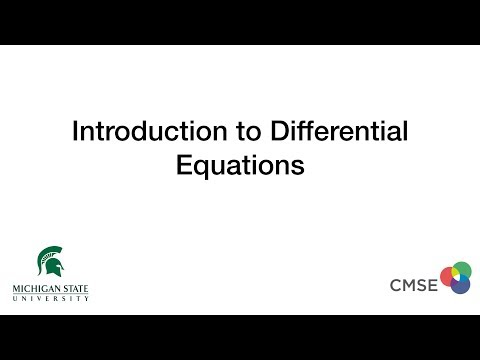

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo("8QeCQn7uxnE",width=640,height=360, cc_load_policy=True)

Now consider an ODE as a system of linear equations:

$$\dot{x_t} = A x_t$$

Based on the current $x$ vector at time $t$ and the matrix $A$, we can calculate the derivative $\dot{x}$ at time $t$.  Once we know the derivative, we can increment the time by some small amount $dt$ and calculate a new value of $x$ as follows:

$$x_{t+1} = x_t + \dot{x_t}dt$$

Then we can do the exact sequence of calculations again for $t+2$. The following function has the transition matrix ($A$), the starting state vector ($x_0$) and a number of time steps ($N$) and uses the above equations to calculate each state and return $x$ at each time step:


The following code generates a trajectory of points starting from `x_0`, applying the matrix $A$ to get $x_1$ and then applying $A$ again to see how the system progresses from the start state. 


In [20]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing()

In [21]:
def traj(A, x, n):
    dt = 0.01
    x_all = np.matrix(np.zeros((len(x),n)))   # Store all points on the trajectory
    for i in range(n):  
        x_dot = A*x         # First we transform x into the derrivative
        x = x + x_dot*dt    # Then we estimate x based on the previous value and a small increment of time.
        x_all[:,i] = x[:,0] 
    return x_all

For example the following code uses the matrix $A= \begin{bmatrix}1 & 1 \\ 1 & -2\end{bmatrix}$ and the starting point (0,0) over 50 timesteps to get a graph:

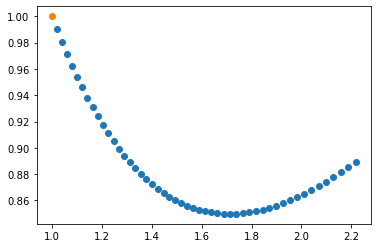

In [22]:
A = np.matrix([[1,1],[1,-2]])
x0 = np.matrix([[1],[1]])

x_all = traj(A, x0, 50)
plt.scatter(np.asarray(x_all[0,:]),np.asarray(x_all[1,:]))

plt.scatter(list(x0[0,:]),list(x0[1,:])) #Plot the start point as a refernce

&#9989;  **<font color=red>Do this:</font>** Let 
$$A= \begin{bmatrix}2 & 3 \\ 4 & -2\end{bmatrix}$$

Write a loop over the points $(1.5,1)$, $(-1.5,-1)$, $(-1,2)$ and plot the results of the ```traj``` function: 

In [27]:
A = np.matrix([[2,3],[4,-2]])
x0 = np.matrix([[1.5, -1.5, -1],[1, -1, 2]])

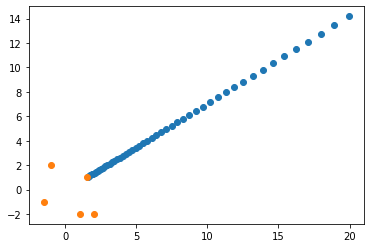

In [32]:
# Put your code here

x_all = traj(A, x0, 50)
plt.scatter(np.asarray(x_all[0,:]),np.asarray(x_all[1,:]))

plt.scatter(list(x0[0,:]),list(x0[1,:])) #Plot the start point as a refernce

&#9989;  **<font color=red>Do this:</font>** Let 
$$A= \begin{bmatrix}6 & -1 \\ 1 & 4\end{bmatrix}$$

Write a loop over the points $(1.5,1)$, $(-1.5,-1)$, $(-1,2)$, $(1,-2)$ and $(2,-2)$ and plot the results of the ```traj``` function: 

In [29]:
A = np.matrix([[6,-1],[1,4]])
x0 = np.matrix([[1.5, -1.5, -1, 1, 2],[1, -1, 2, -2, -2]])

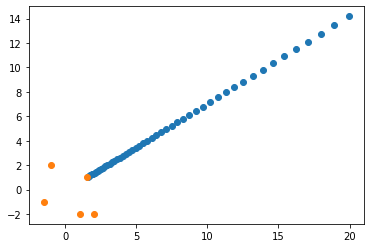

In [30]:
x_all = traj(A, x0, 50)
plt.scatter(np.asarray(x_all[0,:]),np.asarray(x_all[1,:]))

plt.scatter(list(x0[0,:]),list(x0[1,:])) #Plot the start point as a refernce

&#9989;  **<font color=red>Do this:</font>** Let 
$$A= \begin{bmatrix}5 & 2 \\ -4 & 1\end{bmatrix}$$

Write a loop over the points $(1.5,1)$, $(-1.5,-1)$, $(-1,2)$, $(1,-2)$ and $(2,-2)$ and plot the results of the ```traj``` function: 

In [33]:
A = np.matrix([[5,2],[-4,1]])
x0 = np.matrix([[1.5, -1.5, -1, 1, 2],[1, -1, 2, -2, -2]])

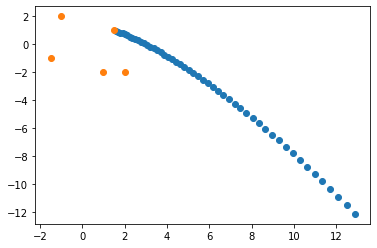

In [34]:
x_all = traj(A, x0, 50)
plt.scatter(np.asarray(x_all[0,:]),np.asarray(x_all[1,:]))

plt.scatter(list(x0[0,:]),list(x0[1,:])) #Plot the start point as a refernce

In [35]:
A = np.matrix([[1,1],[1,-2]])
x0 = np.matrix([[1.5, -1.5, -1, 1, 2],[1, -1, 2, -2, -2]])

IndexError: index 2 is out of bounds for axis 0 with size 2

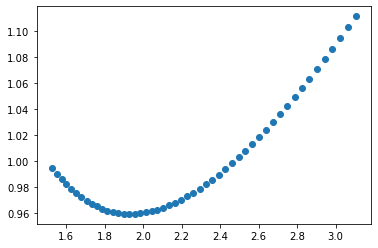

In [43]:
x_all = traj(A, x0, 50)
plt.scatter(np.asarray(x_all[0,:]),np.asarray(x_all[1,:]))

plt.scatter(list(x0[0,:]),list(x0[2,:])) #Plot the start point as a refernce

----
Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

###STARTFOOTER###

---------
### Congratulations, we're done!

----